#Q1 1.A Plant Pathology client is working on identifying diseases impacting agricultural crops. They have a dataset of crop images with labels of diseases impacting them. Dataset can be found here: a. Create an EDA report for the above stated problem, outlining what & why of your approach?

In [ ]:
import pandas as pd
train=pd.read_csv("../input/plant-pathology-2020-fgvc7/train.csv")

In [ ]:
train.image_id=train.image_id+".jpg"

In [ ]:
labels=[]
for i in range(len(train)):
  if train.loc[i,"healthy"]==1:
    labels.append("healthy")
  elif   train.loc[i,"multiple_diseases"]==1:
    labels.append("multiple_diseases")
  elif   train.loc[i,"rust"]==1:
    labels.append("rust")
  else:
    labels.append("scab")


In [ ]:
train["label"]=labels

In [ ]:
train

In [ ]:
#no of plants in each category
train.iloc[:,1:5].sum()

In [ ]:
# The count of Rust and Healty Plant is too high in comparision to Multiple diseases.
#4.99% of sample plant have multiple disease 

In [ ]:
# Checking 6 Random Images 

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
num=np.random.choice(train.image_id,6)

c=1
plt.figure(figsize=(40,20))
for n in num:
  plt.subplot(2,3,c)
  image=cv2.imread("../input/plant-pathology-2020-fgvc7/images/"+n)
  image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  plt.imshow(image)
  plt.title(f"{n},{image.shape}")
  c+=1

In [ ]:
# Looking at 5 random images of plants with scabs

scabs=train["image_id"][train.scab==1].reset_index()
scabs

num=np.random.choice(scabs.image_id,5)

c=1
plt.figure(figsize=(40,20))
for n in num:
  plt.subplot(1,5,c)
  image=cv2.imread("../input/plant-pathology-2020-fgvc7/images/"+n)
  image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  plt.imshow(image)
  plt.title(f"{n},{image.shape}")
  c+=1

In [ ]:
# Looking at 5 random images of plants with rusts

rusts=train["image_id"][train.rust==1].reset_index()
rusts

num=np.random.choice(rusts.image_id,5)

c=1
plt.figure(figsize=(40,20))
for n in num:
  plt.subplot(1,5,c)
  image=cv2.imread("../input/plant-pathology-2020-fgvc7/images/"+n)
  image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  plt.imshow(image)
  plt.title(f"{n},{image.shape}")
  c+=1

In [ ]:
# Looking at 5 random images of plants with multiple diseases

md=train["image_id"][train.multiple_diseases==1].reset_index()


num=np.random.choice(md.image_id,5)

c=1
plt.figure(figsize=(40,20))
for n in num:
  plt.subplot(1,5,c)
  image=cv2.imread("../input/plant-pathology-2020-fgvc7/images/"+n)
  image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  plt.imshow(image)
  plt.title(f"{n},{image.shape}")
  c+=1

In [ ]:
# Looking at 5 random images of healthy leaves

h=train["image_id"][train.healthy==1].reset_index()
h

num=np.random.choice(h.image_id,5)

c=1
plt.figure(figsize=(40,20))
for n in num:
  plt.subplot(1,5,c)
  image=cv2.imread("../input/plant-pathology-2020-fgvc7/images/"+n)
  image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  plt.imshow(image)
  plt.title(f"{n},{image.shape}")
  c+=1


In [ ]:
# In this overall summary we have seen the below bifurcation of the leaves under below categories . in this the count of Rust is too high in comaparision to Multiple Disease . Healty is only 28.3% which is very low 
train.iloc[:,1:5].sum()

#Q2 2.	A Plant Pathology client is working on identifying diseases impacting agricultural crops. They have a dataset of crop images with labels of diseases impacting them. But the client is unable to provide more images (as requested by you) for training:
a.	What is the typical routine you will follow here (when data is scarce) 
b.	What are the basic augmentation techniques you can follow here, please explain how and why they are useful (for plant leaf images) ?  
c.	Try to use augmentation packages other than ImagDataGenerator from keras, example - `imgaug` 


A- When Data is scarce we would follow basic techniques of Augmentation to increase the sample size .

B- Below are the basic Augmentation Procedure that can be followed 


Rotation range:

Image rotation is one of the widely used augmentation techniques and allows the model to become invariant to the orientation of the object.In this dataset this will generate more images with muliple angles when we rotate . As every leave grows in a different direction basis sunlight so with that assumption we can use Rotation option

vertical_flip:

Flipped the image along the vertcal axis. Since the images we are dealing with are symmetrical, this process might be of interest.THe callout in comparison to dataset remains same as mentioned above 

horizontal_flip:

Flipped the image alomg it's horizontal axis. this produces mirror images.THe callout in comparison to dataset remains same as mentioned above 

width_shift_range and height_shift_range: Making sure that the object of interest is at the centre of the image.

brightness_range:

It randomly changes the brightness of the image. It is also a very useful augmentation technique because most of the time our object will not be under perfect lighting condition. So, it becomes imperative to train our model on images under different lighting conditions.

zoom_range:

Zoomed in on the image

shear_range:

Distorted the image a bit so that so that computers can see how humans see things from different angles.

In [ ]:
#c. # imgaug 
import imageio
import imgaug as ia
import imgaug.augmenters as iaa

In [ ]:
# Flipping with imgaug
#Horizontally flipped
hflip= iaa.Fliplr(p=1.0)
hflipped_image2= hflip.augment_image(image)

#Vertically flipped
vflip= iaa.Flipud(p=1.0) 
vflipped_image2= vflip.augment_image(image)

#Q3.	Iterate over and try different architecture and topologies and preserve the results of each experiment using TensorBoard. Also, save major metrics in an Excel (or try W&B).

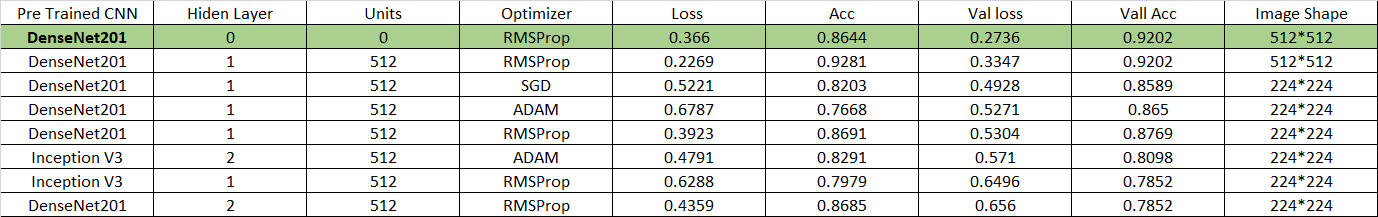

-DenseNet201 has the higher value Accuracy .92 with low Value Loss of .27

-RMS OPS tends to be the best optimizer specific to this model as this is giving higher accuracy and low loss 

-High Image size is providing better accuracy 

In [ ]:
# Split the train set into train and test set

from sklearn.model_selection import train_test_split
train,test=train_test_split(train,test_size=0.1)

In [ ]:
import tensorflow as tf
idg = tf.keras.preprocessing.image.ImageDataGenerator(
    
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=.1,
    fill_mode='nearest',
    shear_range=0.1,
    brightness_range=[0.5, 1.5],
    validation_split=0.1,
    rescale=1./255)

In [ ]:
input_shape=(512,512,3)
img_size=(512,512)
batch_size=16
train_gen = idg.flow_from_dataframe(
                train, directory = '../input/plant-pathology-2020-fgvc7/images',
                target_size = img_size,
                x_col = 'image_id',
                y_col = ['healthy','multiple_diseases','rust','scab'],
                class_mode='raw',
                subset='training',
                batch_size = batch_size)

In [ ]:
val_gen=idg.flow_from_dataframe(train,directory="../input/plant-pathology-2020-fgvc7/images",
                                  target_size=(512,512),
                                  x_col="image_id",
                                  y_col="label",
                                  subset="validation",
                                batch_size=batch_size)  

In [ ]:
import tensorflow as tf
tf.config.threading.set_inter_op_parallelism_threads(4)

In [ ]:
dense=tf.keras.applications.densenet.DenseNet121(include_top=False,
                                               weights='imagenet',
                                               input_shape=input_shape
                                          )

In [ ]:
for layer in dense.layers:
  layer.trainable=False

In [ ]:
x=dense.output
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.GlobalAveragePooling2D()(x)
#x=tf.keras.layers.Dense(512,activation="relu")(x)
x=tf.keras.layers.Dropout(0.2)(x)
pred=tf.keras.layers.Dense(4,activation="softmax")(x)
model=tf.keras.Model(inputs=dense.input,outputs=pred)

In [ ]:
model.compile(tf.keras.optimizers.RMSprop(),
              loss="categorical_crossentropy",
              metrics=["acc"])

In [ ]:
early_stopping=tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=5)
redu_lr=tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)
tftb=tf.keras.callbacks.TensorBoard(log_dir="logs")

In [ ]:
hist=model.fit(train_gen,validation_data=val_gen,epochs=5,batch_size=batch_size,callbacks=[early_stopping,redu_lr,tftb])

In [ ]:
model.save("Plant")

In [ ]:
new_model=tf.keras.models.load_model("Plant")

In [ ]:
test=test.reset_index()
test

In [ ]:
actual_labels=[]
for i in range(len(test)):
  if test.loc[i,"label"]=="healthy":
    actual_labels.append(0)
  elif   test.loc[i,"label"]=="multiple_diseases":
    actual_labels.append(1)
  elif   test.loc[i,"label"]=="rust":
    actual_labels.append("2")
  else:
    actual_labels.append("3")


In [ ]:
test["actual"]=actual_labels
test.actual=test.actual.astype("int")

In [ ]:
test

In [ ]:
model.input_shape

In [ ]:
import cv2
import numpy as np
predicted_labels=[]
for i in range(len(test)):
 image=test.loc[i,"image_id"]
 image=cv2.cvtColor(cv2.imread("../input/plant-pathology-2020-fgvc7/images/"+image),cv2.COLOR_BGR2RGB)
 image=image/255.0  # data preprocessing
 image=cv2.resize(image,(512,512))
 image=np.expand_dims(image,axis=0)
 predicted_labels.append(np.argmax(model.predict(image)))

In [ ]:
predicted_labels

In [ ]:
test["pred"]=predicted_labels

In [ ]:
test

#Q4.	For the above prepared model prepare a classification report with major metrics (confusion metric, recall, precision., etc) on the test data.

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

confusion_matrix(test.pred,test.actual) # Confusion Matrix


In [ ]:
accuracy_score(test.actual,test.pred)

In [ ]:
print(classification_report(test.pred,test.actual)) # Classification report

#Q5.	For the above problem statement, save the model and re-use it in another Collab sheet and perform a prediction. For prediction, create a separate function which will expect an input image and output the prediction label (with confidence).

In [ ]:
def prediction (input_image):
 image=cv2.cvtColor(cv2.imread("../input/plant-pathology-2020-fgvc7/images/"+input_image),cv2.COLOR_BGR2RGB)
 image=image/255.0  # data preprocessing
 image=cv2.resize(image,(512,512))
 image=np.expand_dims(image,axis=0)

 z=np.argmax(new_model.predict(image))
 actual=test[test.image_id==input_image].actual
 actual=np.array(actual)
 acc_score=accuracy_score(actual,np.array([z]))
  
 if z==0:
   print("The leaf is healthy!")
 elif z==1:
   print("The leaf has multiple diseases!")
 elif z==2:
    print("The leaf has rust")
 else:
   print("The leaf has scabs")
 print("The accuracy of prediction is:",acc_score)  


In [ ]:
#prediction ("Train_727.jpg")

In [ ]:
#prediction ("Train_1050.jpg")